## Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)
import numpy as np
import janitor
from sklearn.linear_model import LinearRegression

janitor allows command to find and replace

## Import Household Adult File

In [8]:
from nhanes.household_adult_file import HouseholdAdultFile
nh = HouseholdAdultFile()

In [9]:
nh.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


## Import Exam File

In [10]:
import nhanes.exam_file
importlib.reload(nhanes.exam_file)
from nhanes.exam_file import ExamFile

In [11]:
exam = ExamFile()

In [12]:
exam.data.shape

(31311, 45)

In [13]:
exam.cols

,description,variable,position,end position,length
0,Respondent identification number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
2363,Time to complete 8-ft walk--trial B(sec),PFPTWLKB,6221,6224.0,4
2364,Number of steps--trial B,PFPNSTPB,6225,6226.0,2
2365,Pain reported on walking,PFPPAIN,6227,NaN,1
2366,Type of device used,PFPDEVIC,6228,NaN,1


## Import Household Youth File

In [14]:
import nhanes.household_youth_file
importlib.reload(nhanes.household_youth_file)
from nhanes.household_youth_file import HouseholdYouthFile

In [15]:
youth = HouseholdYouthFile()

In [16]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Combine adult and exam files - adult_exam

match files on the SEQN field 

In [17]:
adult_exam = nh.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [18]:
adult_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 3 to 53623
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HAR1           20050 non-null  int64  
 1   HAR23          20050 non-null  int64  
 2   HAR26          20050 non-null  int64  
 3   HAC1E          20050 non-null  int64  
 4   HAC1F          20050 non-null  int64  
 5   HAC1G          20050 non-null  int64  
 6   HAC1O          20050 non-null  int64  
 7   HAL6           20050 non-null  int64  
 8   HAL10          20050 non-null  int64  
 9   HAL1           20050 non-null  int64  
 10  HAL3           20050 non-null  int64  
 11  HAL5           20050 non-null  int64  
 12  DMARACER       20050 non-null  int64  
 13  DMARETHN       20050 non-null  int64  
 14  DMAETHNR       20050 non-null  int64  
 15  HSSEX          20050 non-null  int64  
 16  HSAGEIR        20050 non-null  int64  
 17  HSAGEU         20050 non-null  int64  
 18  HXPAXT

## Combine youth and exam files - youth_exam

In [19]:
youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [20]:
youth_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 7 to 53622
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HYE1G          13944 non-null  int64  
 1   HYE1H          13944 non-null  int64  
 2   HSSEX          13944 non-null  int64  
 3   HSAGEIR        13944 non-null  int64  
 4   HSAGEU         13944 non-null  int64  
 5   DMARACER       13944 non-null  int64  
 6   DMARETHN       13944 non-null  int64  
 7   DMAETHNR       13944 non-null  int64  
 8   HXPAXTMR       36 non-null     float64
 9   HXPSESSR       36 non-null     float64
 10  HYG2           2216 non-null   float64
 11  HYG4           2216 non-null   float64
 12  HYG7           3690 non-null   float64
 13  HYG8           13944 non-null  int64  
 14  HYG12          13944 non-null  int64  
 15  HSAITMOR       13944 non-null  int64  
 16  SPPQ1          4281 non-null   float64
 17  SPPQ2          4281 non-null   float64
 18  SPPQ3 

In [21]:
youth_exam.query('HSAGEIR < 18').shape

(13944, 60)

# Hankinson Exclusion

Ages - have none over 89; 17-89
20,050 patients in adult exam file (age > 0)

Any age  .shape - returns row and column count of a dataset

.describe() - returns statistics about numerical columns

.dtypes - returns the data type of each column

.count() - number of total values in column

.value_counts() - returns object counting counts of unique values

In [22]:
adult_exam.query('HSAGEIR>0').shape

(20050, 66)

Any spirometry  H 16484 

20050 adult in exam file
16840  adult did spirometry

## SPPMANEU - # acceptable trials

According to the NHANES documentation, the values for SPPMANEU (number of acceptable trials)

00 150; 01-16 20836. 88 1445 blank 8880

so total spirometry is 150 + 20836 = 20986, but this doesn't match, looking at data base values which has 16840 with SPPMANEU 0 to <88

In [23]:
adult_exam.SPPMANEU.value_counts()

5.0     7569
6.0     2553
4.0     1932
7.0     1544
88.0    1310
8.0     1238
3.0      668
9.0      400
2.0      292
10.0     233
1.0      226
0.0      144
11.0      23
13.0       8
12.0       8
14.0       1
16.0       1
Name: SPPMANEU, dtype: int64

adult_exam.SPPMANEU.value_counts()

In [24]:
adult_exam.query('SPPMANEU != 88').shape

(18740, 66)

In [25]:
adult_exam.query('SPPMANEU > -1 & SPPMANEU < 88').shape

(16840, 66)

## total with spirometry 16840
total 2 or more spirometry 16470

## number 2 or more acceptable trials  H 277, 16207  we have 16470 (+263)

In [26]:
adult_exam.query('2 <= SPPMANEU < 88').shape

(16470, 66)

In [27]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88').shape

(16470, 66)

### SPPREPRO = 4 both FVC and FEV1 reproducible; 1 FVC not reproducible; 2 FEV1 no reprod 3 neither FVC or FEV1 reproducible
What closely matches Hankinson is to take subjects with FEV1 reproducible or both FEV1 and FVC reproducible
15286 have 2 or more, both FEV1 and FVC reproducible
16289 have 2 or more, FEV1 reproducible - use that criteria (=4 | =1)

In [28]:
adult_exam.SPPREPRO.value_counts()

4.0    15373
8.0     1454
1.0     1003
3.0      267
2.0       53
Name: SPPREPRO, dtype: int64

In [29]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88 & SPPREPRO == 4').shape

(15286, 66)

In [30]:
adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)').shape

(16289, 66)

and age < 90 H 68,16139  we have 84  16386 (+26, +247)

In [31]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').shape

(16386, 66)

In [32]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('HSAGEIR < 90').shape)

(16215, 66)

## and age <90 16386, 16215

# first number is with 2 or more spirometries and = the parameter; 2nd is 2 or more with reproducible FEV1 with not the parameter

adult_exam.query('HSAGEIR >= 90').shape

and race/ethnicity not other  H 636, 15503

adult_exam.query('HSAGEIR > 0').shape

and race/ethnicity not other  H 636  15503  we have 639, 15747 (+3, +244)

In [33]:
adult_exam.DMARETHN.value_counts()

1    8483
2    5486
3    5306
4     775
Name: DMARETHN, dtype: int64

In [34]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN == 4').shape

(639, 66)

In [35]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').shape)

(15747, 66)

In [36]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').shape)

(15580, 66)

# and race not other 15747, 15580

and cigarette smoker H 7,667  7,836  We have  7787 7960 (+120  +124)


In [37]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

or statement not work, so need HAR1 = 2

In [38]:
adult_exam.query('HAR1 == 1' or 'HAR1 == 8').shape

(9799, 66)

In [39]:
adult_exam.query('HAR1 == 1 | HAR1 == 8').shape

(9815, 66)

In [40]:
adult_exam.query('HAR1 == 2').shape

(10235, 66)

age<90 & ethnicity not other and not smoker(HAR1==2)

In [41]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

(7960, 66)

# and not smoker('not HAR1==1') 7960, 7851

In [42]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape

(7960, 66)

In [43]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape)

(7851, 66)

HXPG1 how many cigarettes past 5 days. 0, #, or 888 applicable  SO '0 < HXPG1 < 888'
65 smoke cigarettes past 5 days

In [44]:
adult_exam.query('0 < HXPG1 < 888').shape

(65, 66)

include those not smoking cigarettes 5 days

In [45]:
adult_exam.query('not (0 < HXPG1 < 888)').shape

(19985, 66)

In [46]:
adult_exam.query('(HXPG1 ==0) | (HXPG1 == 888)').shape

(392, 66)

HXPG2A -pipes

In [47]:
adult_exam.query('0 < HXPG2A < 88').shape

(6, 66)

HXPG2B - cigars

In [48]:
adult_exam.query('0 < HXPG2B < 88').shape

(1, 66)

adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

cigs, pipe, cigars

In [49]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('MYPB11 ==1').shape

(0, 66)

and cigar or pipe smoker  H 313, 7523  for cigar we have 284, 7676 

cigar HAR23  2 is not cigar

In [50]:
adult_exam.HAR23.value_counts()

2    17951
1     2073
8       21
9        5
Name: HAR23, dtype: int64

In [51]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').query('HAR23 == 2').shape

(7676, 66)

and pipe smoker with above H 313 7523  We have 326 7634 (+13 +111)

In [52]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

In [53]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape

(7634, 66)

In [54]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2')
 .query('HAR23 == 2').query('not HAR26 == 1').shape)

(7638, 66)

In [55]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' ).shape)

(7531, 66)

# and not cigar or pipe smoker 7634, 7531

and smoked cigarettes/cigar/pipes in 5 d prior to exam  H 408 7115  

SPQ4 cough, cold or other acute illness;  SPQ3 smoked, ate in past hour

In [56]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

In [57]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').query('SPPQ5 == 2').shape

(5965, 66)

In [58]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape)

(7634, 66)

# add exclude if smoked in 5 days - only 2 more excluded 7632, 7529

In [59]:
adult_exam.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape

(19979, 66)

In [60]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7632, 66)

In [61]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7529, 66)

In [62]:
adult_exam.HAC1E.value_counts()

2    18672
1     1376
9        1
8        1
Name: HAC1E, dtype: int64

In [63]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

and asthma H  454  6661  query('HAC1E == 2') (which gives different that > 1

In [64]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

(7158, 66)

# and asthma (7156 , 7060)

In [65]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

(7156, 66)

In [66]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1').shape)

(7060, 66)

and chronic bronchitis H  181, 6480  HAC1F == 2

In [67]:
adult_exam.HAC1F.value_counts()

2    18914
1     1134
9        2
Name: HAC1F, dtype: int64

In [68]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

(6962, 66)

# and chronic bronchitis (6960, 6868 subjects remaining)

In [69]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

(6960, 66)

In [70]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
. query('not HAC1F == 1').shape)

(6868, 66)

and emphysema  H 15, 6465  HAC1G == 2


In [71]:
adult_exam.HAC1G.value_counts()

2    19614
1      430
9        5
8        1
Name: HAC1G, dtype: int64

In [72]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').shape

(6945, 66)

# and emphysema (6943, 6852 remaining)

In [73]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2').shape)

(6943, 66)

In [74]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
  .query('not HAC1G == 1').shape)

(6852, 66)

## When add cancer excludes many, but Hankinson none (when lung cancer), so exclude this future analyses

In [75]:
adult_exam.HAC1O.value_counts()

2    19266
1      780
9        3
8        1
Name: HAC1O, dtype: int64

In [76]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAC1O == 2').shape

(6756, 66)

and wheezing 6 month  H 419 6046  HAL6

In [77]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

In [78]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').shape

(6495, 66)

and whistling or wheezing  H 112 5934  HAL10

In [79]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

# and wheezing 12 months 6493, 6408

In [80]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2').shape)

(6493, 66)

In [81]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1').shape)

(6408, 66)

# and wheezing 12 months not=1

In [82]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('not HAL6 == 1').shape)

(6494, 66)

In [83]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').shape

(6368, 66)

# and wheezing apart from colds 6366, 6285

In [84]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2')
 .query('HAL10 == 2').shape)

(6366, 66)

In [85]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .shape)

(6285, 66)

In [86]:
adult_exam.HAL10.value_counts()

2    17958
1     2072
8       14
9        6
Name: HAL10, dtype: int64

and persistent cough H 158, 5776  HAL1

# and not persistent cough 6200, 6121

In [87]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').shape

(6200, 66)

In [88]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .shape)

(6121, 66)

In [89]:
adult_exam.HAL1.value_counts()

2    18461
1     1582
8        6
9        1
Name: HAL1, dtype: int64

# and not persistent phlegm H 125  5776  HAL 3, 6065,5990

In [90]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').shape

(6065, 66)

In [91]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .shape)

(5990, 66)

# and moderate shortness of breath H  848  4803  HAL5  5151 5116

In [92]:
adult_exam.HAL3.value_counts()

2    18330
1     1705
8       12
9        3
Name: HAL3, dtype: int64

In [93]:
adult_exam.HAL5.value_counts()

2    14910
1     5030
8       64
9       46
Name: HAL5, dtype: int64

In [94]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .shape)

(5116, 66)

In [95]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').query('HAL5 == 2').shape

(5151, 66)

In [96]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').shape

(5122, 66)

# and age < 81  H  139 4634  HSAGEIR 4944, 4925


adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

In [97]:
(adult_exam.query('2 <= SPPMANEU < 88')
.query('HSAGEIR < 90').query('DMARETHN < 4')
.query('HAR1 == 2').query('HAR23 > 1')
.query('HAR26 > 1').query('HAC1E > 1')
.query('HAC1F > 1').query('HAC1G > 1')
.query('HAC1O > 1').query('HAL6 > 1')
.query('HAL1 > 1').query('HAL3 > 1')
.query('HAL5 == 2').query('HSAGEIR < 81').shape)

(4944, 66)

In [98]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAGEIR < 81')
 .shape)

(4925, 66)

## Now create DataFrame adult_final of the final rows selected

set AdultFinal = adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

Not use this adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

In [99]:
adult_final = (adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1').query('not HAC1G == 1')
 .query('not HAL6 == 1').query('not HAL10 == 1')
 .query('not HAL1 == 1').query('not HAL3 == 1').query('not HAL5 == 1')
 .query('HSAGEIR < 81'))

In [100]:
af = adult_final

In [101]:
af.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 3 to 53623
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HAR1           4925 non-null   int64  
 1   HAR23          4925 non-null   int64  
 2   HAR26          4925 non-null   int64  
 3   HAC1E          4925 non-null   int64  
 4   HAC1F          4925 non-null   int64  
 5   HAC1G          4925 non-null   int64  
 6   HAC1O          4925 non-null   int64  
 7   HAL6           4925 non-null   int64  
 8   HAL10          4925 non-null   int64  
 9   HAL1           4925 non-null   int64  
 10  HAL3           4925 non-null   int64  
 11  HAL5           4925 non-null   int64  
 12  DMARACER       4925 non-null   int64  
 13  DMARETHN       4925 non-null   int64  
 14  DMAETHNR       4925 non-null   int64  
 15  HSSEX          4925 non-null   int64  
 16  HSAGEIR        4925 non-null   int64  
 17  HSAGEU         4925 non-null   int64  
 18  HXPAXTM

In [102]:
nh.cols[nh.cols.description.str.contains('age')]

,description,variable,position,end position,length
157,Language used by SP in MEC,MXPLANG,1232,NaN,1
168,Language of family interview,HFLANG,1254,NaN,1
175,Type of Medicare coverage,HFB3,1263,NaN,1
190,Insurance coverage check item,HFB13,1278,NaN,1
192,"No insur: poor health, illness, age(ph1)",HFB14AC,1280,NaN,1
218,Parent high blood cholesterol at any age,HFC6C,1308,NaN,1
220,Parent asthma or hay fever at any age,HFC6D,1310,NaN,1
222,Parent diabetes at any age,HFC6E,1312,NaN,1
300,Family reference person age - years,HFHAGER,1418,1420.0,3
308,Respondent age in years,HFAGERR,1431,1433.0,3


In [103]:
af.SPPFEV1

SEQN
3        4640.0
4        3089.0
45       1840.0
52       4658.0
60       3651.0
          ...  
53558    2626.0
53567    3348.0
53592    3642.0
53593    5214.0
53623    3196.0
Name: SPPFEV1, Length: 4925, dtype: float64

## Now do youth exclusion

In [104]:
youth_exam.shape

(13944, 60)

13944 youth in exam file
4146  youth did spirometry

In [105]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').shape

(4146, 60)

age 8-17

In [106]:
youth_exam.query('7 < HSAGEIR < 17').shape

(5365, 60)

In [107]:
youth_exam.query('HSAGEIR > 0').shape

(13944, 60)

Youth ethnicity

In [108]:
youth_exam.query('HSAGEIR > 0').shape

(13944, 60)

In [109]:
youth_exam.DMARETHN.value_counts()

1    4602
3    4445
2    4141
4     756
Name: DMARETHN, dtype: int64

spirometry unusable <2 curves

In [110]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.shape)

(4076, 60)

In [111]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').shape

(4114, 60)

ethnicity other

In [112]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').shape

(3928, 60)

In [113]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.shape)

(3890, 60)

In [114]:
youth_exam.MYPB1.value_counts()

2.0    3394
1.0     724
8.0     162
9.0       1
Name: MYPB1, dtype: int64

MYPB1 smoked at least one cigarette - too many so not use
MYPB11 cigarettes smoked in the past 5 days
MYPB3 smoked 100+cigarettes in life
MYPB27A pipes past 5 days
MYPB27B cigars past 5 days

In [115]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB1 == 1').shape

(3238, 60)

In [116]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').shape

(3813, 60)

In [117]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.shape)

(3775, 60)

smoked 5 days B11 and B27

In [118]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').shape

(3594, 60)

and B27

In [119]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').shape

(3593, 60)

In [120]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.shape)

(3555, 60)

asthma E1g

In [121]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').shape

(3268, 60)

In [122]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.shape)

(3232, 60)

chronic bronchitis E1h

In [123]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').shape

(3180, 60)

In [124]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.shape)

(3145, 60)

wheezing 12 months

In [125]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').shape

(2899, 60)

In [126]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.shape)

(2867, 60)

wheezing apart from colds

In [127]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').shape

(2848, 60)

In [128]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.shape)

(2816, 60)

Youth 12 years and older with above H 1298

In [129]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('HSAGEIR > 11').shape

(1305, 60)

In [130]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('HSAGEIR > 11')
.shape)

(1294, 60)

and not persistent cough G2 H 2816 **I all age

In [131]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').shape

(2832, 60)

In [132]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.shape)

(2800, 60)

and not persistent phlegm G4 H 2806

In [133]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').shape

(2822, 60)

In [134]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.shape)

(2790, 60)

and Youth age 8-under 12

In [135]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('HSAGEIR < 12').shape

(1543, 60)

In [136]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('HSAGEIR < 12')
.shape)

(1522, 60)

and not persistent cough G6 and G7

In [137]:
youth_exam.HYG7.value_counts()

1.0      1071
2.0       959
3.0       588
4.0       333
555.0     294
6.0       117
5.0       115
12.0       48
10.0       29
8.0        26
7.0        24
999.0      18
20.0       18
888.0      16
24.0       12
15.0        8
9.0         4
30.0        2
120.0       1
104.0       1
60.0        1
13.0        1
11.0        1
25.0        1
35.0        1
14.0        1
Name: HYG7, dtype: int64

In [138]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

(2812, 60)

In [139]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.shape)

(2780, 60)

## Create youth_final

youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

not use anymore youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

In [140]:
youth_final = (youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555'))

In [141]:
youth_final.shape

(2780, 60)

In [142]:
youth_final.head(2)

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
14,2,2,2,16,2,1,1,3,NaN,NaN,...,166.9,87.0,47.50,1,1.0,3.0,196.0,NaN,NaN,NaN
16,2,2,1,16,2,1,3,1,NaN,NaN,...,167.6,89.2,62.65,1,3.0,1.0,198.0,NaN,NaN,NaN


After all of the exclusions, the youth_final dataframe has 2812 entries.

In [143]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Reviewing adult file

In [144]:
cols = nh.cols
cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


In [145]:
cols[cols.description.str.contains('(?:smok|cig)')]

,description,variable,position,end position,length
259,Anyone living here smoke cigs in home,HFF1,1356,NaN,1
260,# persons who smoke cigarettes in home,HFF2R,1357,1358.0,2
261,Cigarettes per day person 1 smokes,HFF3A,1359,1361.0,3
262,Cigarettes per day person 2 smokes,HFF3B,1362,1364.0,3
263,Cigarettes per day person 3 smokes,HFF3C,1365,1367.0,3
264,Cigarettes per day person 4 smokes,HFF3D,1368,1370.0,3
265,Cigarettes per day person 5 smokes,HFF3E,1371,1373.0,3
266,Cigarettes per day person 6 smokes,HFF3F,1374,1376.0,3
419,Doctor told stop smoking for HBP,HAE4D3,1606,NaN,1
428,Now quit smoking for high blood pressure,HAE5D3,1615,NaN,1


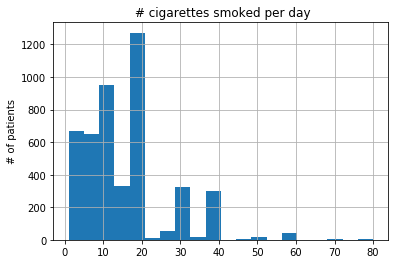

In [146]:
nh.hist_amount('HAR4S');

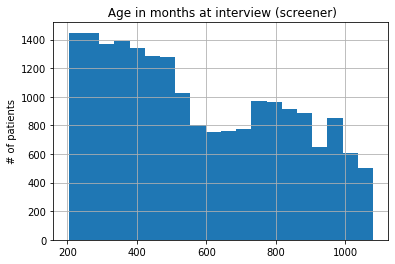

In [147]:
nh.hist_amount('HSAITMOR',outliers=1200);

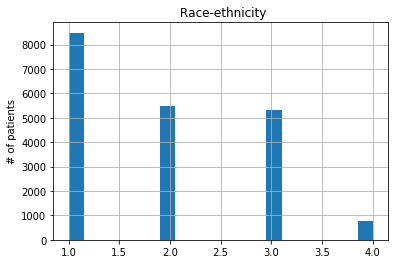

In [148]:
nh.hist_amount('DMARETHN', outliers=25);

In [149]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

/usr/local/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,description,variable,position,end position,length
210,Mother's weight calculated in pounds,HFC2S,1300,NaN,1
212,Father's weight calculated in pounds,HFC4S,1302,NaN,1
414,Doctor told control/lose weight for HBP,HAE4B,1601,NaN,1
424,Now controlling or losing weight for HBP,HAE5B,1611,NaN,1
435,Doctor told lose weight for HBC,HAE8B,1622,NaN,1
439,Now losing weight to lower cholesterol,HAE9B,1626,NaN,1
444,"On own for HBC, controlled/lost weight",HAE11B,1631,NaN,1
599,Difficulty lifting or carrying 10 pounds,HAH4,1807,NaN,1
705,Consider self over/under/right weight,HAM11,1964,NaN,1
707,Tried to lose weight in past 12 months,HAM13,1966,NaN,1


In [150]:
cols[cols.description.str.contains('stand') ]

,description,variable,position,end position,length
450,If stand still is chest pain relieved,HAF5,1637,NaN,1
466,Leg pain begin while stand still/sitting,HAF15,1658,NaN,1
472,Is leg pain relieved if you stand still,HAF21,1664,NaN,1
478,Problem with ability to speak/understand,HAF27,1670,NaN,1
604,Difficulty standing from armless chair,HAH9,1812,NaN,1


Test Markdown

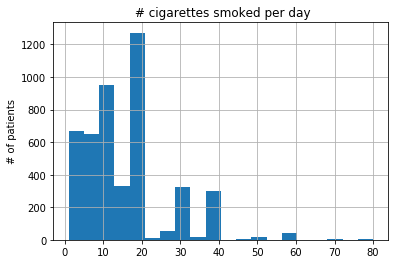

In [151]:
nh.hist_amount('HAR4S');

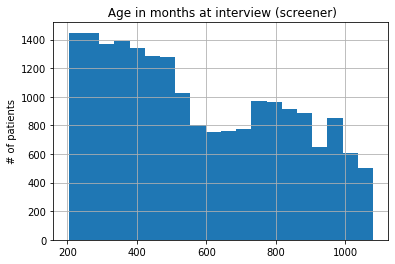

In [152]:
nh.hist_amount('HSAITMOR',outliers=1200);

## Now analyze adult_final

In [153]:
adult_final.head()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,...,178.8,93.1,81.60,1,3.0,1.0,261.0,NaN,NaN,NaN
4,2,2,2,2,2,2,2,2,2,2,...,162.2,86.1,61.65,1,3.0,1.0,384.0,NaN,NaN,NaN
45,2,2,2,2,2,2,2,2,2,2,...,163.4,NaN,68.00,2,2.0,3.0,813.0,0.0,0.0,88.0
52,2,2,2,2,2,2,2,2,2,2,...,178.2,95.4,79.60,1,3.0,1.0,602.0,NaN,NaN,NaN
60,2,2,2,2,2,2,2,2,2,2,...,175.3,89.3,74.20,2,2.0,3.0,235.0,NaN,NaN,NaN


In [154]:
adult_final[adult_final.SPPFEV1==8888]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,


In [156]:
adult_final[adult_final.SPPFEV3==88888]
# this shows rows with 88888 in SPPFEV3 - 45, 2518, 3216, 5167 etc
# Then want replace with NaN

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
45,2,2,2,2,2,2,2,2,2,2,...,163.4,NaN,68.0,2,2.0,3.0,813.0,0.0,0.0,88.0
2518,2,2,2,2,2,2,2,2,2,2,...,167.4,NaN,68.6,1,1.0,3.0,897.0,0.0,0.0,88.0
3216,2,2,2,2,2,2,2,2,2,2,...,158.8,NaN,55.4,1,1.0,3.0,952.0,0.0,0.0,88.0
5167,2,2,2,2,2,2,2,2,2,2,...,154.0,NaN,72.2,1,1.0,3.0,959.0,0.0,0.0,88.0
6658,2,2,2,2,2,2,2,2,2,2,...,181.9,NaN,92.4,1,1.0,3.0,864.0,0.0,0.0,88.0
7806,2,2,2,2,2,2,1,2,2,2,...,148.9,NaN,57.6,1,1.0,3.0,917.0,0.0,0.0,88.0
9762,2,2,2,2,2,2,2,2,2,2,...,157.0,NaN,57.6,1,3.0,1.0,251.0,0.0,0.0,88.0
10143,2,2,2,2,2,2,1,2,2,2,...,163.9,NaN,81.4,1,3.0,1.0,845.0,0.0,0.0,88.0
10245,2,2,2,2,2,2,2,2,2,2,...,170.8,NaN,79.0,1,1.0,3.0,407.0,0.0,0.0,88.0


In [157]:

adult_final.update_where( (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)


,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,...,178.8,93.1,81.60,1,3.0,1.0,261.0,NaN,NaN,NaN
4,2,2,2,2,2,2,2,2,2,2,...,162.2,86.1,61.65,1,3.0,1.0,384.0,NaN,NaN,NaN
45,2,2,2,2,2,2,2,2,2,2,...,163.4,NaN,68.00,2,2.0,3.0,813.0,0.0,0.0,88.0
52,2,2,2,2,2,2,2,2,2,2,...,178.2,95.4,79.60,1,3.0,1.0,602.0,NaN,NaN,NaN
60,2,2,2,2,2,2,2,2,2,2,...,175.3,89.3,74.20,2,2.0,3.0,235.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53558,2,2,2,2,2,2,2,2,2,2,...,163.1,83.3,64.10,1,1.0,3.0,663.0,NaN,NaN,NaN
53567,2,2,2,2,2,2,2,2,2,2,...,158.7,84.4,74.55,1,3.0,1.0,432.0,NaN,NaN,NaN
53592,2,2,2,2,2,2,2,2,2,2,...,166.8,85.5,53.20,1,3.0,1.0,235.0,NaN,NaN,NaN


In [158]:
adult_final[adult_final.SPPFEV1==8888]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,


In [ ]:
adult_final.describe()

In [1032]:
m20overb[m20overb.MMEFPP > 20]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,FEV1OFVCPP,PEFROFVCPP,FEV1OFEV6PP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFVCPP,FEV6OFVCPP,FEV1PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,PEFRPPOFEV1PP,PEFRPPOFVCPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1PPh,FVCPPh,PEFRPPh,FEV6PPh,MMEFPPh,FEV1OFVCPPdiff,FEV1OFEV6PPdiff,PEFPPh
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19420,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,1,52,2,636.0,2.0,635,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,52.0,2.0,636.0,2.0,1.0,1605.0,4.0,9189.0,8888.0,2880.0,88888.0,88888.0,3420.0,88888.0,8888.0,3.0,4.0,88888,7.0,30.0,1.0,5761.77,NaN,167.7,NaN,67.6,2,2.0,3.0,635.0,0.0,0.0,88.0,0.842105,0.0324,2.686842,0.103377,3.190625,25.990643,25.990643,1.02795,1.27132,0.038918,0.04815,1.240173,25.862785,24.95715,1.026198,0.972015,1.216527,22.702044,21.792346,25.268035,9.377268,0.65948,0.352346,1.251552,0.009521,0.000367,1.017725,0.95926,1185.282755,25.786934,31.22088,1.018428,0.038551,1.185283


In [ ]:
adult_final.HSAITMOR.hist(bins='auto', range=(0,1200))

# change bad/blank data to NaN

from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  SPPFEF75 1832 with 8888
  
  mapping = {8888: np.nan)
  
  adult_final.update_where( 
      (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
  )
  


Now change blank data (8888 or 88888) to NaN
for variables 
Example below creates new df wind2 from wind
mapping = {-9999.0: np.nan}
wind2 = (
    wind
    .find_replace(
        usgs_pr_id=mapping,
        p_tnum=mapping,
        p_cap=mapping,
        t_cap=mapping,
        t_hh=mapping,
        t_rd=mapping,
        t_rsa=mapping,
        t_ttlh=mapping,
    )
)
wind2.head()

Example below replaces data with nan
(
    wind.update_where(
        (wind['p_year'] < 1887) | (wind['p_year'] > 2018), 'p_year', np.nan
    )
    .update_where((wind['t_hh'] <= 0) | (wind['t_hh'] >= 1000), 't_hh', np.nan)
    .update_where((wind['xlong'] < -161.76) | (wind['xlong'] > -68.01), 'xlong', np.nan)
);
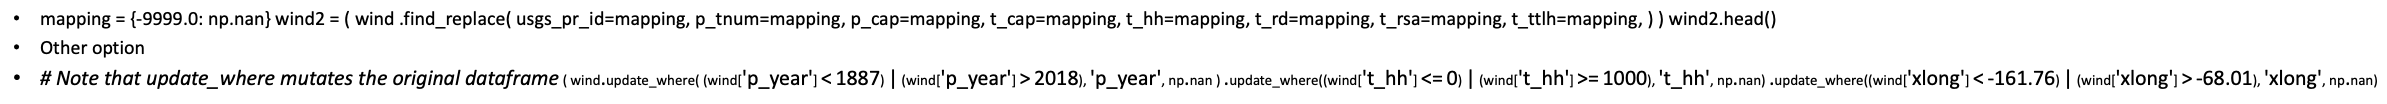

## Create new fields in adult_final and youth_final

Create new fields (XoY = X/Y) in youth_final and adult_final

In [ ]:
oldvariables = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

## Create new variables in adult_final final and youth_final

newvariables = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return

In [ ]:
def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return
    

createvariables(adult_final) then youth_final

In [ ]:
createvariables(adult_final)

In [ ]:
createvariables(youth_final)

In [ ]:
adult_final.PEFROFVC.hist(bins='auto', range=(0,5))

In [ ]:
youth_final.PEFROFVC.hist(bins='auto', range=(0,5))

In [ ]:
adult_final.FEV1OFVC.hist(bins='auto')

In [ ]:
adult_final.describe()

In [ ]:
adult_final.BMPHT.std()

In [ ]:
adult_final.describe()

In [ ]:
print (adult_final.columns.values)

In [ ]:
print (youth_final.columns.values)

In [ ]:
youth_final.describe()

# Created other data bases to analyze

# adult m20overb m20overcma f18overb f18overcma

male 20 over. female 18 over; and cma (Caucasian-Mexican American) or b (black)
NOT NEED m20over = adult_final.query('HSAGEIR >=20 & HSSEX == 1’)
NOT NEED f18over = adult_final.query('HSAGEIR >=18 & HSSEX == 2’)
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other


In [ ]:
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

In [ ]:
f18overb.describe()

## Make dataframes mlt20 and flt18 for b, c, ma and cma combining adult final and youth final

male<20,female<18
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other

In [ ]:
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

# Create data bases for all male/female cma, black for ratios

Groups for ratios
All male cma  mallcma = pd.concat([m20overcma, mlt20cma])
All male black  mallb = pd.concat([m20overb, mlt20b])
All female cma  fallcma = pd.concat([f18overcma, flt18cma])
All female black  fallb = pd.concat([f18overb, flt18b])
All male c  mallc = pd.concat([m20overc, mlt20c])
All male ma  mallma = pd.concat([m20overma, mlt20ma])
All female c  fallc = pd.concat([f18overc, flt18c])
All female ma  fallma = pd.concat([f18overma, flt18ma])

In [ ]:
mallcma = pd.concat([m20overcma, mlt20cma])
mallb = pd.concat([m20overb, mlt20b])
fallcma = pd.concat([f18overcma, flt18cma])
fallb = pd.concat([f18overb, flt18b])
mallc = pd.concat([m20overc, mlt20c])
mallma = pd.concat([m20overma, mlt20ma])
fallc = pd.concat([f18overc, flt18c])
fallma = pd.concat([f18overma, flt18ma])

## Check variable created

In [ ]:
flt18b.SPPFEV1.hist(bins='auto')

In [ ]:
flt18b.PEFROFVC.hist(bins='auto', range=(0,5))

In [ ]:
flt18b.HSAITMOR.hist(bins='auto', range=(0,300))

In [ ]:
flt18b.BMPHT.hist(bins='auto', range=(0,300))

## Frames to Analyze

framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

In [ ]:
framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

# framesto analyze names

m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20ovecma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

In [ ]:
m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20overma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

## Variables non-ratio

varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [ ]:
varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [ ]:
print (varsnonratio[0])

## Variables ratio

varsratio = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

In [ ]:
varsratio= ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

## Now fit curves

using example in lmfit.github.io/lmfit-py/model.html

import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

## from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression Age  linear_regage (data, y_var)

In [ ]:
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAITMOR_exam']/12  # to convert to year do months at exam
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
 # now returns values rather than print - intercept, slope, R2, std, count
    return lr.intercept_, lr.coef_, lr.score(X, y),  data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [ ]:
for x in varsratio:
    print (x)

## For all frames, for all ratios to analyze, do regression vs age & save in resultsratioand index dfnvarn

print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation')
for y in framestoanalyze:
Save results in dataframe resultsratio

In [ ]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratio = pd.DataFrame(columns = column_names)
resultsratio.name = 'resultsratio'
print (resultsratio)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratio:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratio = resultsratio.append(df2, ignore_index=True)    
print ('at end')
resultsratio.set_index('dfnvarn', inplace=True)
print (resultsratio)
    
    

# regression for non-ratios height_age_reg(data, y_var)

In [1005]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAITMOR_exam']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [1006]:
for x in varsnonratio:
    print (x)

SPPFEV1
SPPFEV3
SPPFEV6
SPPFVC
SPPPEAK
SPPMMEF
SPPFEF75
SPPEXPIR


# Create Resultsnonratio with all of regression results for all dataframes all nonratio variables

In [ ]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
  #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef 
                  
         dfnvarn = y.name + xx
         print (dfnvarn, ',', dbname, ',', var, ',',intercept, ',',b1, ',',b2, ',',b3, ',',r2, ',',std, ',',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]  
            
         df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)
print ('at end')
resultsnonratio.set_index('dfnvarn', inplace=True)
print (resultsnonratio)            

## ****** Now percent predicted - create variables for ratios first

First function to create PPratiovars for a dataframe, then create for all dataframes

In [ ]:
def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))

For all dataframes, create ppvar values (shows caveat but works)

In [ ]:
for y in framestoanalyze:
    createvarspp(y)

In [ ]:
print (m20overb.columns.values)

Check can refer to resultsratio value

In [ ]:
print(resultsratio)

In [ ]:
vn = 'm20overbFEV1OFVC'
print(resultsratio.loc[vn, 'intercept'] )

In [ ]:
print(resultsnonratio)

In [ ]:
vn = 'm20overbSPPFEV1'
print(resultsnonratio.loc[vn, 'intercept'] )

# Now create PP Nonratio PP  FEV1PP, PEFRPP, FVCPP, FEV3PP, FEV6PP, MMEFPP, FEF75PP, EXPIRPP  from resultsnonratio

In [1009]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratiopp(df):
    vn = df.name + 'SPPFEV1'
    df['FEV1PP'] = df.SPPFEV1 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFVC'
    df['FVCPP'] =  df.SPPFVC /  (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPPEAK'
    df['PEFRPP'] = df.SPPPEAK / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV3'
    df['FEV3PP'] = df.SPPFEV3 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV6'
    df['FEV6PP'] = df.SPPFEV6 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPMMEF'
    df['MMEFPP'] = df.SPPMMEF / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEF75'
    df['FEF75PP'] = df.SPPFEF75 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPEXPIR'
    df['EXPIRPP'] = df.SPPEXPIR / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [1010]:
resultsnonratio.describe()

,intercept,b1,b2,b3,r2,std
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,-6.682860,-12.157943,1.028093,0.131285,0.412468,1934.269834
std,1974.123846,141.013121,5.323028,0.082072,0.323113,2025.558969
min,-4558.302101,-373.132002,-22.087885,-0.037668,0.002876,2.465703
25%,-1071.036191,-68.077434,-0.366614,0.082045,0.086297,706.499189
50%,-148.092110,-5.100334,0.002710,0.141519,0.391419,1050.598582
75%,349.697800,23.911322,0.964650,0.178933,0.728717,2713.328122
max,8680.810369,727.708714,22.750997,0.416021,0.917794,8165.560068


For all dataframes create varsnonratiopp

In [ ]:
for y in framestoanalyze:
    print(y.name)
    createvarsnonratiopp(y)

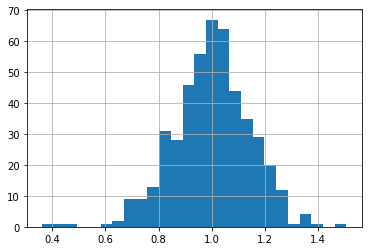

In [1013]:
m20overb.FEV1PP.hist(bins='auto')

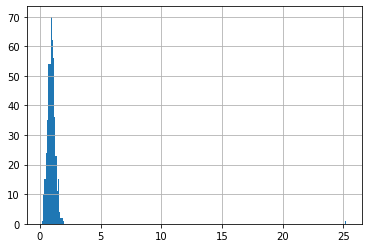

In [1015]:
m20overb.MMEFPP.hist(bins='auto')

In [1018]:
m20overb.MMEFPP.describe()

count    476.000000
mean       0.998767
std        1.152928
min        0.177399
25%        0.741264
50%        0.939923
75%        1.134040
max       25.268035
Name: MMEFPP, dtype: float64

In [1021]:
pd.set_option('display.max_columns', 999)

In [1022]:
m20overb[m20overb.MMEFPP > 20]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,FEV1OFVCPP,PEFROFVCPP,FEV1OFEV6PP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFVCPP,FEV6OFVCPP,FEV1PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,PEFRPPOFEV1PP,PEFRPPOFVCPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1PPh,FVCPPh,PEFRPPh,FEV6PPh,MMEFPPh,FEV1OFVCPPdiff,FEV1OFEV6PPdiff,PEFPPh
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19420,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,1,52,2,636.0,2.0,635,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,52.0,2.0,636.0,2.0,1.0,1605.0,4.0,9189.0,8888.0,2880.0,88888.0,88888.0,3420.0,88888.0,8888.0,3.0,4.0,88888,7.0,30.0,1.0,5761.77,NaN,167.7,NaN,67.6,2,2.0,3.0,635.0,0.0,0.0,88.0,0.842105,0.0324,2.686842,0.103377,3.190625,25.990643,25.990643,1.02795,1.27132,0.038918,0.04815,1.240173,25.862785,24.95715,1.026198,0.972015,1.216527,22.702044,21.792346,25.268035,9.377268,0.65948,0.352346,1.251552,0.009521,0.000367,1.017725,0.95926,1185.282755,25.786934,31.22088,1.018428,0.038551,1.185283


Has many values as 88888 for SPPTIME, and 8888.0 SPPFEF75 AND SPPFEV05, 88888.0 for SPPMMEF, SPPFEV3, SPPFEV05, SPPFEV6
  from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  so need replace those in adult and youth files

So when doing analysis need ignore values of 8888

In [1027]:
m20overb[m20overb.MMEFPP > 20]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC,FEV1OFVCPP,PEFROFVCPP,FEV1OFEV6PP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFVCPP,FEV6OFVCPP,FEV1PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,PEFRPPOFEV1PP,PEFRPPOFVCPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1PPh,FVCPPh,PEFRPPh,FEV6PPh,MMEFPPh,FEV1OFVCPPdiff,FEV1OFEV6PPdiff,PEFPPh
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19420,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,1,52,2,636.0,2.0,635,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,52.0,2.0,636.0,2.0,1.0,1605.0,4.0,9189.0,8888.0,2880.0,88888.0,88888.0,3420.0,88888.0,8888.0,3.0,4.0,88888,7.0,30.0,1.0,5761.77,NaN,167.7,NaN,67.6,2,2.0,3.0,635.0,0.0,0.0,88.0,0.842105,0.0324,2.686842,0.103377,3.190625,25.990643,25.990643,1.02795,1.27132,0.038918,0.04815,1.240173,25.862785,24.95715,1.026198,0.972015,1.216527,22.702044,21.792346,25.268035,9.377268,0.65948,0.352346,1.251552,0.009521,0.000367,1.017725,0.95926,1185.282755,25.786934,31.22088,1.018428,0.038551,1.185283


# Now create variables that depend on PP - PEFRPPOFVCPP, and PEFRPPOFEV1PP, 
then regression vs age in resultsppvars in form dfvartnam, bo, b1
then new value %pred
then 

create PEFRpp/FEV1pp and PEFRpp/FVCpp for all dataframes

In [ ]:
def createvariablespp(df):
    df['PEFRPPOFEV1PP'] = df.PEFRPP / df.FEV1PP
    df['PEFRPPOFVCPP']= df.PEFRPP/ df.FVCPP
    return

In [ ]:
for y in framestoanalyze:
    createvariablespp(y)

linear regression of PEFRpp/FEV1pp and PEFRpp/FVCpp vs age into resultsratiopp; for all dataframes

In [ ]:
varsratiopp= ['PEFRPPOFEV1PP', 'PEFRPPOFVCPP']

# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

In [ ]:
# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

In [ ]:
for y in framestoanalyze:
    createvariablespp(y)

Createvarsppopp for PEFRPPOFVCPPPP and PEFRPPOFVCPPPP

In [ ]:
def createvarsppopp(df):
    vn = df.name + 'PEFRPPOFVCPP'
    df['PEFRPPOFVCPPPP'] = df.PEFRPPOFVCPP / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFRPPOFEV1PP'
    df['PEFRPPOFEV1PPPP'] = df.PEFRPPOFEV1PP / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))

In [ ]:
m20overc.FEV1OFVC.hist(bins='auto')

In [ ]:
m20overc.FEV1OFVCPP.hist(bins='auto')

In [ ]:
std = m20overc.FEV1OFVC.std()
mean = m20overc.FEV1OFVC.mean()
ratio = std / mean # m20overc.FEV1OFVC.std()/m20overc.FEV1OFVC.mean()
print (mean, ratio, ratio* 1.645, mean - (ratio*1.645))
print (.876 * mean)

says mean FEV1/FVC .788, lower limit if use std for all data .645

The std is smaller for %predicted than for actual value
so to get 5% lower limit can use %predicted - 1.645 * std

In [ ]:
std = m20overc.FEV1OFVCPP.std()
mean = m20overc.FEV1OFVCPP.mean()
ratio = std/mean # m20overc.FEV1OFVCPP.std()/m20overc.FEV1OFVCPP.mean()
print (mean, ratio, ratio*1.645, mean - (ratio*1.645))

says mean FEV1/FVC %pred is 100% and lower limit .876 of that
if use prior mean FEV1/FVC of .788, .876 of that is .69 which is higher than .645

Try saving variables to array

In [ ]:
print (m20overc.name)
print (varsratio[1])
dfvar = m20overc.name + varsratio[1]
print (dfvar)

In [ ]:
print (resultsratio)

new variable %pred ratios

data.loc['m20overbFEV1OFVC']

In [ ]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAGEIR']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [ ]:
height_age_reg(m20overb, 'SPPFEV1')

# Regression for all dataframes all nonratio variables & save resultsnonratio

In [ ]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)

## Create percent predicted variables xxPP

def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
    resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
    a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
    b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
    df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
  #  df['FEV1OFVCPP'] = df. FEV1OFVC / (resultsratio.loc [vn,intercept] + resultsratio.loc[vn,slope]) # * df.HSAGEIR/12)
  #  df['FEV1OFVCPP'] = df.FEV1OFVC / 100
  def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
  #  resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
  #  a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
   # b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
 #   df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))


def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))

In [997]:
def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))

In [998]:
print (m20overb)

       HAR1  HAR23  HAR26  HAC1E  HAC1F  HAC1G  HAC1O  HAL6  HAL10  HAL1  ...  \
SEQN                                                                      ...   
215       2      2      2      2      2      2      2     2      2     2  ...   
460       2      2      2      2      2      2      2     2      2     2  ...   
576       2      2      2      2      2      2      2     2      2     2  ...   
580       2      2      2      2      2      2      2     2      2     2  ...   
876       2      2      2      2      2      2      2     2      2     2  ...   
...     ...    ...    ...    ...    ...    ...    ...   ...    ...   ...  ...   
53347     2      2      2      2      2      2      2     2      2     2  ...   
53371     2      2      2      2      2      2      2     2      2     2  ...   
53446     2      2      2      2      2      2      2     2      2     2  ...   
53490     2      2      2      2      2      2      2     2      2     2  ...   
53495     2      2      2   

## now need do the same using Hankinson equations
Hvarlistnonratio - FEV1, FVC, FEV6, MMEF, PEF
Hvarlistratio - FEV1OFEV6, FEV1OFVC
need first enter Hresults into hresultsratio names intercept, slope 
  H has same equation for youth and adults for ratios
and Hresults into hresultsnonratio with names intercept, b1, b2
Can read from excel or csv file - data = pd.read_csv("filename.csv"); then data.head() to look at first five lines
then createvarsratiopph and createvarsnonratiopph for each in hvarlistratio and hvarlistnonratio
then creatediffsppratio and creatediffsppnonratio for each in hvarlistratio and hvarlistnonratio
the show mean and std of each variable

In [ ]:
hvarlistnonratio = [ 'SPPFEV1', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF']

In [ ]:
hvarlistratio = ['SPPFEV1OFVC','SPPFEV1OFEV6']

## Create dataframes hresultsratio hresultsnonratio from the csv files

In [ ]:
import os

In [ ]:
os.getcwd()

In [ ]:
os.listdir(os.getcwd())

In [ ]:
hresultsratio = pd.read_csv("data/hankinson_ratio.csv")
hresultsratio.set_index('dfnvarn', inplace=True)
print (hresultsratio)

In [ ]:
hresultsratio.head()

In [ ]:
hresultsnonratio = pd.read_csv("data/hankinson_nonratio.csv")
hresultsnonratio.set_index('dfnvarn', inplace=True)
print (hresultsnonratio)

In [ ]:
hresultsnonratio.head()

In [ ]:
def createvarsratiopph(df):
    vn = df.name + 'FEV1OFVC'
#    print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
    df['FEV1OFVCPPh'] = df.FEV1OFVC / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPh']= df.FEV1OFEV6 / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    

In [ ]:
def createvarsnonratiopph(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1PPh'] = df.SPPFEV1 / 1000/(hresultsnonratio.loc[vn, 'intercept']  + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPPh'] = df.SPPFVC / 1000 /(hresultsnonratio.loc[vn, 'intercept'] + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'PEF'
    df['PEFPPh'] = df.SPPPEAK /1000/ (hresultsnonratio.loc[vn, 'intercept'] + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6PPh'] = df.SPPFEV6 /1000/ (hresultsnonratio.loc[vn, 'intercept'] + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPPh'] = df.SPPMMEF / 1000/(hresultsnonratio.loc[vn, 'intercept'] + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )


In [ ]:
hresultsratio.index

In [ ]:
hratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, 
                   mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma, 
                    mallb, mallc, mallma,  fallb, fallc, fallma]

In [ ]:
hnonratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, 
                   mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma ]

In [ ]:
hresultsnonratio.index

In [ ]:
for y in hratioframestoanalyze:
#    print (y.name)
    createvarsratiopph(y)

In [ ]:
for y in hnonratioframestoanalyze:
#    print (y.name)
    createvarsnonratiopph(y)

creatediffsppratio and creatediffsppnonratio 

In [ ]:
m20overc.FEV6PPh.hist(bins='auto')

In [ ]:
m20overb.FEV1PPh.describe()

There is one m20overb FEV1PPh of -.211 which should be removed
need find out which one this is and why

In [1024]:
m20overc.FEV6PPh.describe()

count    497.000000
mean       1.092900
std        1.446012
min        0.516701
25%        0.928017
50%        0.996131
75%        1.085380
max       26.680609
Name: FEV6PPh, dtype: float64

There is one m20overc FEV6PP of 26.68 - an outlier which should be removed
need find out which one this is and why

In [1025]:
m20overb.FEV6PPh.describe()

count    476.000000
mean       1.046748
std        1.146185
min       -0.333071
25%        0.917875
50%        1.002208
75%        1.088402
max       25.786934
Name: FEV6PPh, dtype: float64

In [ ]:
m20overb[m20overb.MMEFPP > 20]

m20overb FEV6 - has one -.33, max 25.78

In [1026]:
m20overma.FEV6PPh.describe()

count    592.000000
mean       1.045041
std        1.054283
min        0.550087
25%        0.929660
50%        1.001255
75%        1.086675
max       26.500665
Name: FEV6PPh, dtype: float64

In [1023]:
m20overb.FVCPPh.describe()

count    476.000000
mean       0.994234
std        0.152799
min       -0.418322
25%        0.915074
50%        0.999618
75%        1.087108
max        1.379428
Name: FVCPPh, dtype: float64

FVC m20overb FVCPPh min -.418

should look at all the FVC values for m20overb and see if any are negative
or print the FVC and FVCPPh for all of those and see which is off (is a predicted negative)

FVC equation is good for m20overc;  FEV6 equation is bad (or has bad data)

To search for bad data need check min and max for all dataframes for all PP values; check for all absolute values that none are negative

In [ ]:
mlt20ma.FVCPPh.describe()

m20overma FEV6PPh max 26.5

In [ ]:
m20overc.FEV1PP.hist(bins='auto')

FEV1PP on our data is not 1 - why is that

In [ ]:
m20overc.FEV1PPh.hist(bins='auto')

In [ ]:
def creatediffsppratio(df):
    df['FEV1OFVCPPdiff'] = df.FEV1OFVCPP - df.FEV1OFVCPPh
    df['FEV1OFEV6PPdiff'] = df.FEV1OFEV6PP - df.FEV1OFEV6PPh 
    

In [ ]:
for y in hratioframestoanalyze:
#    print (y.name)
    creatediffsppratio(y)

In [ ]:
m20overc.FEV1OFVCPP.hist(bins='auto')

In [ ]:
m20overc.FEV1OFVCPPh.hist(bins='auto')

In [ ]:
m20overc.FEV1OFVCPPdiff.hist(bins='auto')

In [ ]:
plt.scatter(X, y)

In [ ]:
from scipy import stats

# now plot y actual value (e.g. of PEFR/FVC) vs predicted PEFR/FVC
first need new value PEFROFVCPRED = the regression for predicted
  and PEFROFVCPP - %predicted of PEF
then do linear regression of x = PEFROFVCPRED and y = PEFROFVCROFVC
do scatter plot of X,y to see if 
do histogram of PEFROFVC
do linear regression and scatter plot of PEFROFVCPP (y) versus age to see if the SDev varies by age
need see if normal distribution of 

Also have new variables PEFRPP/FVCPP - or PEFRPP-FVCPP
  then see if one or other has normal distribution and what is variance
  ratio should be centered around 1; and difference around 0
  I have been using PEFRPP-FVCPP >30 as indicator, but ratio may be better (e.g. if more than 1.3,

do plot of actual FEV1 vs predicted FEV1 ( x vs y)
to get lower limit, need standard deviation - first see if normal distribution
  then fit to gaussian and sdev from that
  
  need check whether same sdev for each age; whether same for each height, for each height**2, for each predicted FEV1
    by categories


We're trying to replicate and update Hankinson

We're trying to replicate and update Hankinson

# Now need determine LLN - ?used std

Determine lower limit of normal
  can do this if get starndard deviation for each variable
Assuming normal distribution get standard deviation for each variable
Could create variable as %predicted, then do normal distribution of the %predicteds
Would want to check if the standard deviation varied by age ?height
Alternatively is there a way to get lower 5%
